# Trigger delays analysis

In [56]:
%load_ext autoreload
%load_ext usnm2p.skip_kernel_extension
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The usnm2p.skip_kernel_extension extension is already loaded. To reload it, use:
  %reload_ext usnm2p.skip_kernel_extension


### Imports

In [57]:
import os 
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from usnm2p.bruker_utils import *
from usnm2p.fileops import *
from usnm2p.logger import logger
from usnm2p.constants import *

### Inputs

In [58]:
dataroot = '/gpfs/home/lemait01/scratch/data/usnm/raw_bruker'
analysis = 'offset'
mouseline = 'sst'

### Define function to extract delay

In [59]:
def get_trigger_delay_per_trial(fpath):
    _, _, seq_frames, seq_voutputs = parse_bruker_XML(fpath, simplify=False)
    try:
        trigtimes = seq_voutputs['absoluteTime']
    except KeyError as e:
        print(fpath)
        print(seq_voutputs)
        raise e
    try:
        frametimes = seq_frames['absoluteTime']
    except KeyError as e:
        print(fpath)
        print(seq_frames)
        raise e
    times = pd.concat({
        Label.TRIG: trigtimes,
        Label.FRAME: frametimes.loc[seq_voutputs.index].groupby('sequence').first(),
    }, axis=1)
    times[Label.DELAY] = times[Label.FRAME] - times[Label.TRIG]
    times.index = pd.Index(np.arange(len(times)), name= Label.TRIAL)
    return times

### Extract trigger delays for mouseline and analysis type

In [ ]:
# List datasets
mouselinedir = os.path.join(dataroot, analysis, mouseline)
datasets = [k for k in os.listdir(mouselinedir) if k != '.DS_Store']

# Extarct trigger data
mouseline_data = {}
for dataset in datasets:
    logger.info(f'extracting trigger delays from "{dataset}" XML acquisition files')
    acqdir = os.path.join(mouselinedir, dataset)
    acqfolders = get_data_folders(acqdir, recursive=False, exclude_patterns=['mouse', 'incomplete', 'test'])
    acqdata = {}
    for f in tqdm(acqfolders):
        xml = os.path.join(f, get_bruker_XML(f))
        acqdata[os.path.basename(f)] = get_trigger_delay_per_trial(xml)
    acqdata = pd.concat(acqdata, names=['acquisition'])
    mouseline_data[dataset] = acqdata
mouseline_data = pd.concat(mouseline_data, names=[Label.DATASET])
mouseline_data

 2025/07/11 14:38:53: extracting trigger delays from 20190601_mouse2_region1 XML acquisition files
 2025/07/11 14:38:53: searching through /gpfs/home/lemait01/scratch/data/usnm/raw_bruker/offset/sst/20190601_mouse2_region1


 2025/07/11 14:38:53: found 15 folders containing TIF files


100%|██████████| 15/15 [00:04<00:00,  3.35it/s]

 2025/07/11 14:38:58: extracting trigger delays from 20190518_mouse6_region1 XML acquisition files
 2025/07/11 14:38:58: searching through /gpfs/home/lemait01/scratch/data/usnm/raw_bruker/offset/sst/20190518_mouse6_region1
 2025/07/11 14:38:58: found 4 folders containing TIF files



100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

 2025/07/11 14:38:59: extracting trigger delays from 20190601_mouse7_region1 XML acquisition files
 2025/07/11 14:38:59: searching through /gpfs/home/lemait01/scratch/data/usnm/raw_bruker/offset/sst/20190601_mouse7_region1


 2025/07/11 14:38:59: found 16 folders containing TIF files


100%|██████████| 16/16 [00:04<00:00,  3.43it/s]

 2025/07/11 14:39:03: extracting trigger delays from 20190601_mouse8_region1 XML acquisition files
 2025/07/11 14:39:03: searching through /gpfs/home/lemait01/scratch/data/usnm/raw_bruker/offset/sst/20190601_mouse8_region1


 2025/07/11 14:39:04: found 15 folders containing TIF files


100%|██████████| 15/15 [00:04<00:00,  3.33it/s]

 2025/07/11 14:39:08: extracting trigger delays from 20190518_mouse7_region1 XML acquisition files
 2025/07/11 14:39:08: searching through /gpfs/home/lemait01/scratch/data/usnm/raw_bruker/offset/sst/20190518_mouse7_region1


 2025/07/11 14:39:08: found 5 folders containing TIF files


100%|██████████| 5/5 [00:01<00:00,  3.09it/s]


trigger  \
dataset                 acquisition                                        trial            
20190601_mouse2_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_rig... 0        2.936   
                                                                           1        31.24   
                                                                           2       59.537   
                                                                           3       87.846   
                                                                           4      116.147   
...                                                                                   ...   
20190518_mouse7_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_cen... 11     314.402   
                                                                           12     342.697   
                                                                           13       371.0   
                                                                           14     399.297   
                                                                           15     427.601   

                                                                                    frame  \
dataset                 acquisition                                        trial            
20190601_mouse2_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_rig... 0        2.991   
                                                                           1       31.294   
                                                                           2       59.590   
                                                                           3       87.900   
                                                                           4      116.201   
...                                                                                   ...   
20190518_mouse7_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_cen... 11     314.456   
                                                                           12     342.750   
                                                                           13     371.053   
                                                                           14     399.352   
                                                                           15     427.654   

                                                                                  delay  
dataset                 acquisition                                        trial         
20190601_mouse2_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_rig... 0      0.055  
                                                                           1      0.054  
                                                                           2      0.053  
                                                                           3      0.054  
                                                                           4      0.054  
...                                                                                 ...  
20190518_mouse7_region1 sst_100frames_100Hz_200ms_3.56Hz_08MPA_50DC_cen... 11     0.054  
                                                                           12     0.053  
                                                                           13     0.053  
                                                                           14     0.055  
                                                                           15     0.053  

[880 rows x 3 columns]

### Show trigger delay stats per dataset

Text(0.5, 1.0, 'sst offset analysis - delay per dataset')

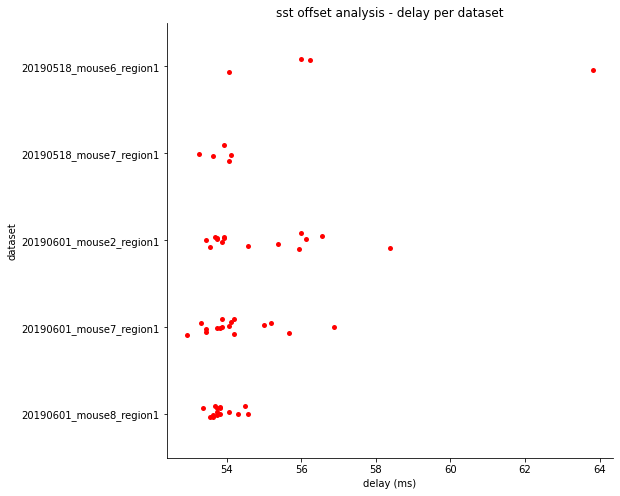

In [ ]:
delays = (mouseline_data['delay'] * 1e3).rename('delay (ms)')
trialavg_delays = delays.groupby([Label.DATASET, 'acquisition']).mean()
fig, ax = plt.subplots(figsize=(8, 8))
sns.despine(ax=ax)
sns.stripplot(
    ax=ax,å
    data=trialavg_delays.reset_index(),
    y=Label.DATASET,
    x=delays.name,
    color=Palette.LINE[mouseline]
)
ax.set_title(f'{mouseline} {analysis} analysis - delay per dataset')